#様々な非線形回帰モデル

## Googleドライブのマウント

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
#seaborn設定
sns.set()
#背景変更
sns.set_style("darkgrid", {'grid.linestyle': '--'})
#大きさ(スケール変更)
sns.set_context("paper")

#非線形データへのアプローチ

与えられた真の関数  

<center>
$f(x) = 1 - 48x + 218x^{2} - 315x^{3} + 145x^{4}$
</center>

から得られるデータにノイズを加える事によって、非線形データを作成します。

In [6]:
n=100

def true_func(x):
    z = 1-48*x+218*x**2-315*x**3+145*x**4
    return z 

def linear_func(x):
    z = x
    return z 

No handles with labels found to put in legend.


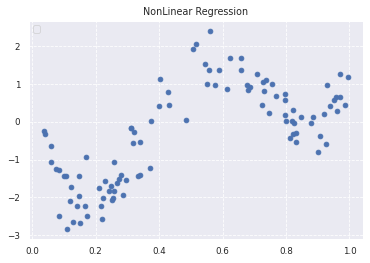

In [7]:
# 真の関数からノイズを伴うデータを生成

# 真の関数からデータ生成
data = np.random.rand(n).astype(np.float32)
data = np.sort(data)
target = true_func(data)

# 　ノイズを加える
noise = 0.5 * np.random.randn(n) 
target = target  + noise

# ノイズ付きデータを描画

plt.scatter(data, target)

plt.title('NonLinear Regression')
plt.legend(loc=2)

#線形回帰モデル  

線形回帰モデルは、そのままでは非線形データのモデルには適していないように思われます。正解率（accuracy）も小さいです。


0.45928311205318717


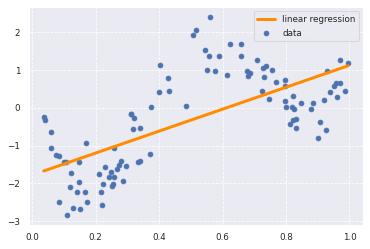

In [8]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
data = data.reshape(-1,1)
target = target.reshape(-1,1)
clf.fit(data, target)

p_lin = clf.predict(data)

plt.scatter(data, target, label='data')
plt.plot(data, p_lin, color='darkorange', marker='', linestyle='-', linewidth=3, markersize=6, label='linear regression')
plt.legend()
print(clf.score(data, target))

#カーネルリッジ回帰による線形回帰モデル 

回帰関数として、基底関数と呼ばれる既知の非線形関数とパラメータベクトルとの線形結合を使用します。

基底関数にガウス型基底関数を取り、正則化項のハイパーパラメータ$\alpha$を0.0002とします。与えられたデータを高い正解率(accuracy)で説明する事ができました。

- ここでは、scikit-learnのKernelRidgeを利用します。
- 下の例では、scikit-learnのlinear_modelからRidgeを利用しています。
- どちらにおいても、同様のリッジ回帰の性質が観察できると思われます。

0.8641745179914214


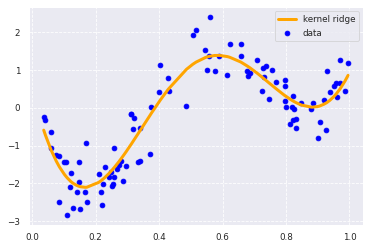

In [9]:
from sklearn.kernel_ridge import KernelRidge

clf = KernelRidge(alpha=0.0002, kernel='rbf')
clf.fit(data, target)

p_kridge = clf.predict(data)

plt.scatter(data, target, color='blue', label='data')

plt.plot(data, p_kridge, color='orange', linestyle='-', linewidth=3, markersize=6, label='kernel ridge')
plt.legend()
#plt.plot(data, p, color='orange', marker='o', linestyle='-', linewidth=1, markersize=6)
print(clf.score(data, target))

#リッジ回帰による線形回帰モデル 

##カーネルトリックによる非線形データへの対応 

基底関数にガウス型基底関数を考えます。  

<center>
${\phi_{j}(x)=exp\left(\frac{(x-\mu_{j})^2}{2h_{j}}\right)
}$
</center>  

ガウス型基底関数は$RBF(radial\ basis\ function)$ とも呼ばれます。

基底関数の表現力が充分に強ければ、線形回帰であるにもかかわらず、非線形データへの精度の高い対応が可能となります。このテクニックはカーネル法あるいはカーネルトリックと呼ばれています。

ガウス型基底関数から以下が導き出されます。

<center>
$K(x, x')=\exp(-\gamma||x-x'||^2)$ $\ni$ $\gamma=\frac{1}{2\sigma^2}$ 
</center>

ここで$\gamma$はハイパーパラメータになります。下の例では$\gamma$が大きい程、表現力が強くなっているようです。過学習が起こっているためにそう判断できます。


##損失関数と正則化項

線回帰分析モデルの損失関数に正則化項を加えたものがリッジ回帰になります。リッジ回帰ではパラメータ$\omega$の値が大きくなりすぎないように(生成されるモデルの形が歪になりすぎないように)パラメータのノルムの2乗(L2ノルム)を損失関数$S_{\gamma}$に加えます。

<center>
$ S_{\gamma} 
= (\boldsymbol{y} - \Phi\boldsymbol{w})^T (\boldsymbol{y} - \Phi\boldsymbol{w}) + \alpha|| \boldsymbol{w} ||_{2}^2 $
</center>

ガウス型基底関数において、$\gamma$の値を十分に大きくすると（例えば$\gamma=50$）その表現力は強くなるようです。そのために、下に見られるように明らかに過学習の状態にあります。  

ここで、正則化項（罰則項）の$\alpha$ の値を十分に大きくする事により（例えば$\alpha=30$）損失関数は過学習する事なく、滑らかなモデルを得る事が分かります。


0.670009197464565


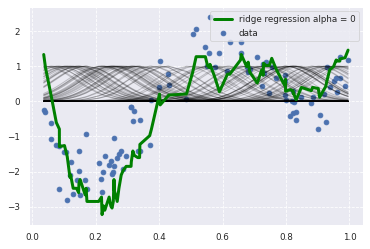

0.8482233961794315


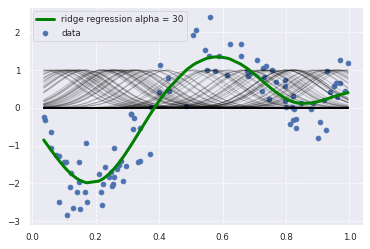

In [10]:
#Ridge

from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Ridge  

# kx = rbf_kernel(X=data, Y=data, gamma=50)
kx = rbf_kernel(X=data, Y=data, gamma=50)
#KX = rbf_kernel(X, x)

#clf = LinearRegression()
#clf = Ridge(alpha=30)

alpha = [0, 30]

for a in alpha:
    clf = Ridge(alpha=a)
    clf.fit(kx, target)

    p_ridge = clf.predict(kx)

    plt.scatter(data, target,label='data')
    for i in range(len(kx)):
        plt.plot(data, kx[i], color='black', linestyle='-', linewidth=1, markersize=3, alpha=0.2)

    #plt.plot(data, p, color='green', marker='o', linestyle='-', linewidth=0.1, markersize=3)
    plt.plot(data, p_ridge, color='green', linestyle='-', linewidth=3, markersize=3,label='ridge regression alpha = %d' % (a))
    #plt.legend()

    print(clf.score(kx, target))

    plt.legend()
    plt.show()

#多項式の基底関数に基づく線形回帰モデル  
基底関数に多項式（1-10次）関数
$ \phi_j = x^j$を考えます。  

基底関数をうまく見付けることができれば、線形回帰手法で非線形モデルを構築できます。(しかし現実には、基底関数として多項式を用いるのでは十分でなく、もっと複雑な関数を採用しなければ予測精度を向上させられません。そして、そのような基底関数を見付けるのは難しいのです。）

以下の場合、4次以上の多項式はすべからく同様にモデルを導き出せるように観察されます。

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

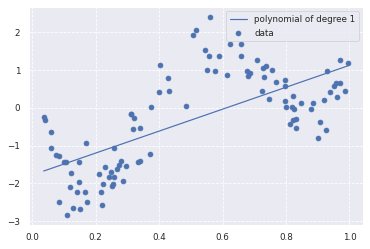

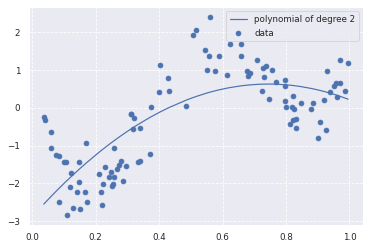

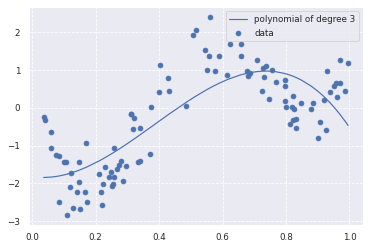

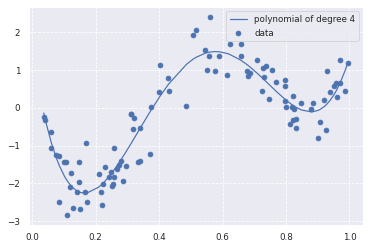

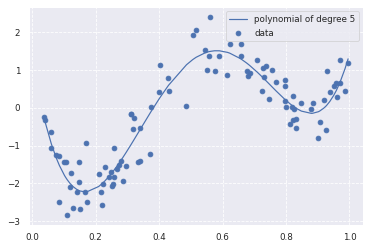

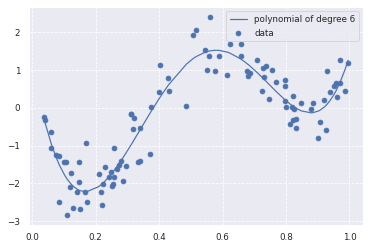

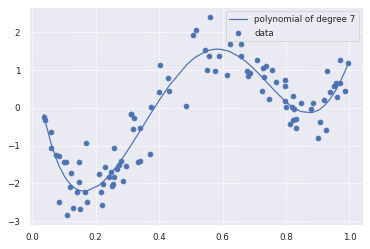

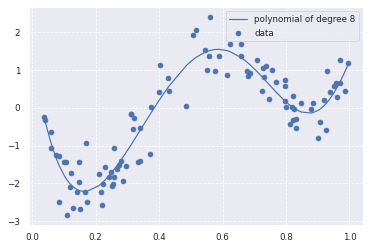

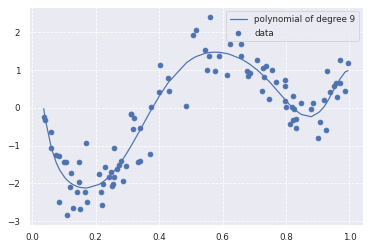

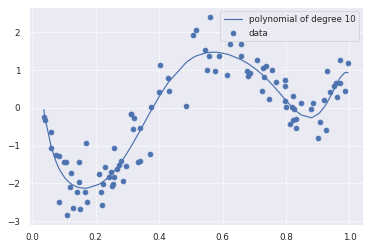

In [12]:
#PolynomialFeatures(degree=1)

deg = [1,2,3,4,5,6,7,8,9,10]

for d in deg:
    regr = Pipeline([
        ('poly', PolynomialFeatures(degree=d)),
        ('linear', LinearRegression())
    ])
    regr.fit(data, target)
    # make predictions
    p_poly = regr.predict(data)
    # plot regression result
    plt.scatter(data, target, label='data')
    plt.plot(data, p_poly, label='polynomial of degree %d' % (d))

    plt.legend()
    plt.show()

#ラッソ回帰による線形回帰モデル

ラッソ回帰において、その損失関数は以下のように定義されます。線回帰分析モデルの損失関数に正則化項を加えたものがラッソ回帰になります。ラッソ回帰では、正則化項はパラメータのノルムの1乗の項(L1ノルム)になります。

<center>
$S_{\gamma} = 
\frac{1}{2}(\boldsymbol{y} - \Phi\boldsymbol{w})^T (\boldsymbol{y} - \Phi\boldsymbol{w}) + \alpha|| \boldsymbol{w} ||_{1}$
</center>

与えられた例では、繰り返しの数の多い程、そして$\alpha$が小さい程$(\alpha= 0.0001)$、良いモデルを獲得する事ができました。ここで、良いモデルとは、正解率（accuracy）の高いモデルの事になります。 

0.0


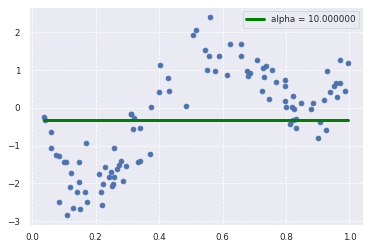

0.0


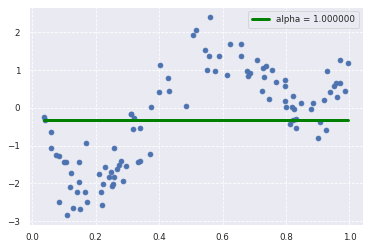

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.266252517700195, tolerance: 0.01666858047246933
  positive)


0.8768434638018833


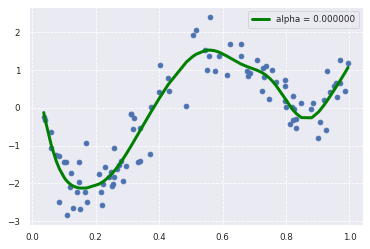

0.7669619210101303


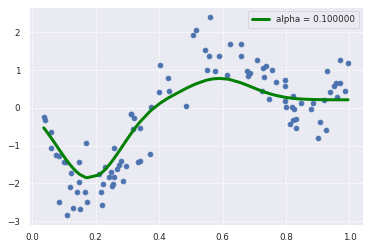

0.8575301514722012


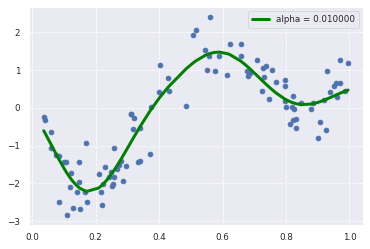

0.8730940528507215


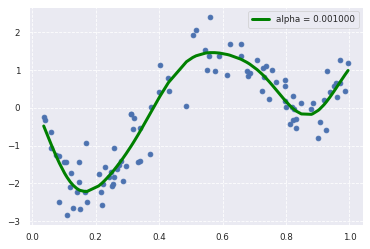

0.8751279313037706


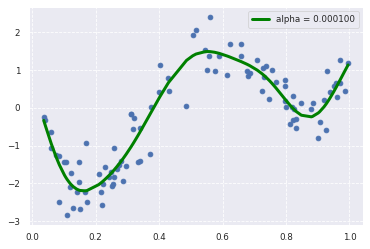

In [13]:
#Lasso

from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Lasso

#kx = rbf_kernel(X=data, Y=data, gamma=500)
kx = rbf_kernel(X=data, Y=data, gamma=50)
#KX = rbf_kernel(X, x)

alpha = [10, 1, 0, 0.1, 0.01, 0.001, 0.0001]
#lasso_clf = LinearRegression()
#lasso_clf = Lasso(alpha=10000, max_iter=1000)
for a in alpha:
    lasso_clf = Lasso(alpha=a, max_iter=100000)
    lasso_clf.fit(kx, target)

    p_lasso = lasso_clf.predict(kx)

    plt.scatter(data, target)

    plt.plot(data, p_lasso, color='green', linestyle='-', linewidth=3, markersize=3, label='alpha = %f' % (a))

    print(lasso_clf.score(kx, target))

    plt.legend()
    plt.show()

ラッソ回帰における特徴量選択の様子を確認します。以下にみられるように多くのパラメータがゼロとなっています。それは、対応する特徴量が考慮されない事を意味します。ラッソ回帰においては、最適解がひし形の頂点となる可能性が高く、ひし形の頂点ではいくつかのパラメータがゼロになるためです。





In [14]:
print(lasso_clf.coef_.round(2)) 

[ 1.87  0.   -0.   -0.   -1.42 -2.28 -0.02 -1.34 -0.   -0.   -0.   -0.
 -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.
 -0.   -0.   -0.05 -0.48 -0.45 -0.22 -0.11 -0.73 -0.31 -0.27 -0.11 -0.
 -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.92 -0.11 -0.
 -0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   -0.   -0.
 -0.99 -0.   -0.   -0.   -0.    0.    0.    0.    0.    0.    0.    0.11
  0.    0.    0.    0.    0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.
 -0.31 -2.35 -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.
 -0.   -0.   -0.   -0.  ]


#サポートベクタマシンによる線形回帰分析

$\gamma$の値を変化させる事によってモデルの表現力に変化が見られます。

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


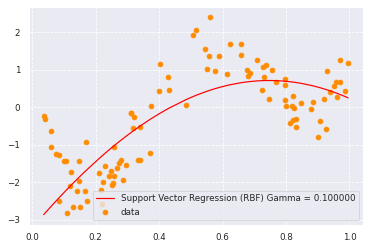

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


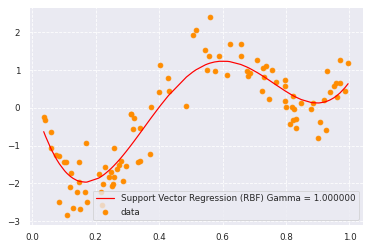

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


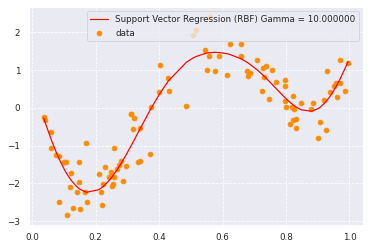

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


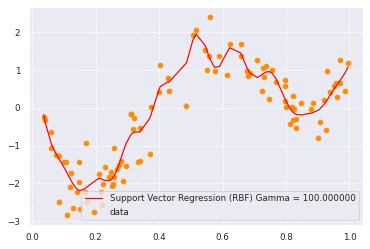

In [34]:
from sklearn import model_selection, preprocessing, linear_model, svm

# SVR-rbf
#clf_svr = svm.SVR(kernel='rbf', C=1e3, gamma=0.1, epsilon=0.1)

for g in [0.1, 1.0, 10, 100]:
    clf_svr = svm.SVR(kernel='rbf', C=1e3, gamma=g, epsilon=0.1)
    clf_svr.fit(data, target)
    y_rbf = clf_svr.fit(data, target).predict(data)
 
    # plot

    plt.scatter(data, target, color='darkorange', label='data')
    plt.plot(data, y_rbf, color='red', label='Support Vector Regression (RBF) Gamma = %f' % (g))
    plt.legend()
    plt.show()

# ディープラーニングモデル

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.1, random_state=0)

以下では，Googleドライブのマイドライブ直下にstudy_ai_mlフォルダを置くことを仮定しています．必要に応じて，パスを変更してください。

In [36]:
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint

cb_cp = ModelCheckpoint('/content/drive/My Drive/study_ai_ml/skl_ml/out/checkpoints/weights.{epoch:02d}-{val_loss:.2f}.hdf5', verbose=1, save_weights_only=True)
cb_tf  = TensorBoard(log_dir='/content/drive/My Drive/study_ai_ml/skl_ml/out/tensorBoard', histogram_freq=0)

In [18]:
def relu_reg_model():
    model = Sequential()
    model.add(Dense(10, input_dim=1, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='linear'))
#     model.add(Dense(100, activation='relu'))
#     model.add(Dense(100, activation='relu'))
#     model.add(Dense(100, activation='relu'))
#     model.add(Dense(100, activation='relu'))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [37]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.wrappers.scikit_learn import KerasRegressor

# use data split and fit to run the model
estimator = KerasRegressor(build_fn=relu_reg_model, epochs=100, batch_size=5, verbose=1)

history = estimator.fit(x_train, y_train, callbacks=[cb_cp, cb_tf], validation_data=(x_test, y_test))

Epoch 1/100
18/18 [==============================] - 1s 37ms/step - loss: 1.9028 - val_loss: 1.4067

Epoch 00001: saving model to /content/drive/My Drive/study_ai_ml/skl_ml/out/checkpoints/weights.01-1.41.hdf5
Epoch 2/100
18/18 [==============================] - 0s 6ms/step - loss: 1.2810 - val_loss: 1.0409

Epoch 00002: saving model to /content/drive/My Drive/study_ai_ml/skl_ml/out/checkpoints/weights.02-1.04.hdf5
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6738 - val_loss: 0.7780

Epoch 00003: saving model to /content/drive/My Drive/study_ai_ml/skl_ml/out/checkpoints/weights.03-0.78.hdf5
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 0.7535 - val_loss: 0.8387

Epoch 00004: saving model to /content/drive/My Drive/study_ai_ml/skl_ml/out/checkpoints/weights.04-0.84.hdf5
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 0.6199 - val_loss: 0.8312

Epoch 00005: saving model to /content/drive/My Drive/study_ai_m

In [20]:
y_pred = estimator.predict(x_train)

18/18 [==============================] - 0s 1ms/step


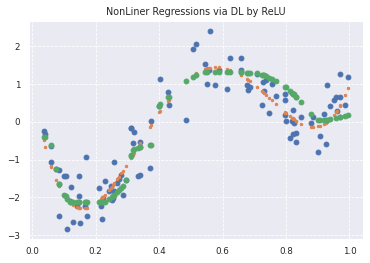

In [21]:
plt.title('NonLiner Regressions via DL by ReLU')
plt.plot(data, target, 'o')
plt.plot(data, true_func(data), '.')
plt.plot(x_train, y_pred, "o", label='predicted: deep learning')
#plt.legend(loc=2)

In [22]:
print(lasso_clf.coef_)

[ 1.87406838e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -1.42324829e+00 -2.28426147e+00 -2.06846260e-02 -1.33634579e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -5.26822470e-02 -4.76178378e-01
 -4.46306497e-01 -2.15644881e-01 -1.05136700e-01 -7.28856087e-01
 -3.06475252e-01 -2.67695129e-01 -1.06895275e-01 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -9.20314074e-01 -1.07020758e-01 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -9.88804996e-01 -0.00000